In [4]:
import numpy as np
from SED_v8 import AGN
from astropy.io import ascii
from SED_plots_v2 import Plotter
import matplotlib.pyplot as plt
from astropy.io import fits
from match import match
from astropy.io import ascii
from mag_flux import mag_to_flux

In [5]:
# inf = ascii.read('/Users/connor_auge/Desktop/M82.csv')
inf = ascii.read('/Users/connor_auge/Desktop/M82_cut.csv')


In [6]:
z = 0.00090
z = 1.2
Lx = np.nan
flux_array = np.asarray(inf['Flux Density'])*1E6
flux_array_err = flux_array*0.2
# filters = np.array(['Fx_hard','FLUX_GALEX_FUV','FLUX_GALEX_NUV','u_FLUX_APER2','B_FLUX_APER2','V_FLUX_APER2','R_Johnson','I_Cousins','J_2mass','H_2mass','Ks_2mass','W1','SPLASH_1_FLUX','SPLASH_2_FLUX','W2','SPLASH_3_FLUX','SPLASH_4_FLUX','W3','IRAS1','W4','FLUX_24','IRAS3','MIPS2','IRAS4','FLUX_160','FLUX_250','FLUX_350','FLUX_500','SCUBA2'])
filters = np.array(['Fx_hard','FLUX_GALEX_FUV','FLUX_GALEX_NUV','u_FLUX_APER2','B_FLUX_APER2','V_FLUX_APER2','R_Johnson','I_Cousins','J_2mass','H_2mass','Ks_2mass','W1','SPLASH_1_FLUX','SPLASH_2_FLUX','SPLASH_3_FLUX','SPLASH_4_FLUX','IRAS1','FLUX_24','IRAS3','MIPS2','IRAS4','FLUX_160','FLUX_250','FLUX_350','FLUX_500','SCUBA2'])

print(len(flux_array),len(filters))

26 26


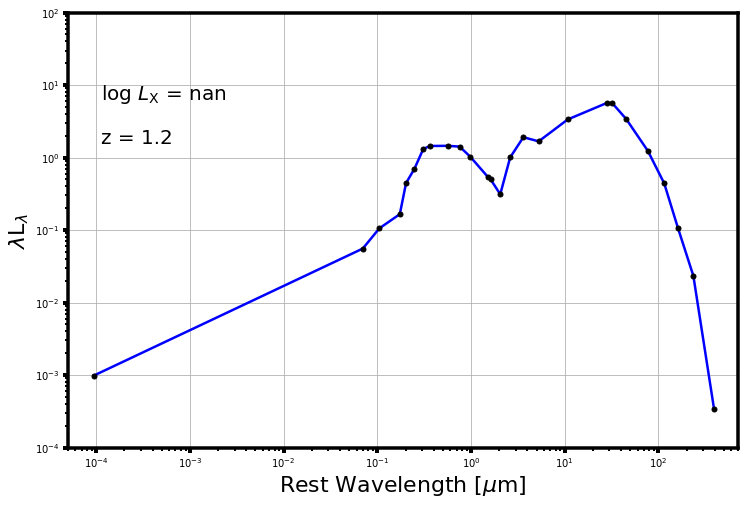

1.4256994425953947e+51
3.751840638408934e+17


In [7]:
source = AGN('M82',z,filters,flux_array,flux_array_err)
source.MakeSED()
source.FIR_extrap(['FLUX_24', 'IRAS3', 'MIPS2', 'IRAS4', 'FLUX_160', 'FLUX_250', 'FLUX_350', 'FLUX_500', 'SCUBA2'])
f1 = source.Find_value(1.0)
Id, redshift, w, f, frac_err = source.pull_plot_info(norm_w=1)
ix, iy = source.Int_SED(xmin=1E-1, xmax=5E2)
wfir, ffir = source.Int_SED_FIR(discreet=True)

lbol = source.Find_Lbol()

up_check = 0
plot = Plotter(Id, redshift, w, f, Lx, f1, up_check)
plot.PlotSED()
print(lbol)
print(lbol/3.8E33)

In [8]:
(918.9-803.5)/918.9

0.12558493851343996

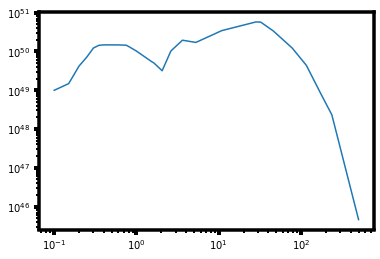

In [9]:
plt.plot(ix, 10**iy)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [10]:
outf = open('/Users/connor_auge/Research/templets/M82.csv','w')
outf.writelines('# wave, lum\n')
for i in range(len(ix)):
    outf.writelines('%f, %f\n' % (ix[i], 10**iy[i]))
outf.close()

In [11]:
temp = ascii.read('/Users/connor_auge/Research/templets/A10_templates.txt')
temp_wave = np.asarray(temp['Wave'])
temp_flux = np.asarray(temp['E'])*1E-16  # erg/s/cm^-2/Hz
temp_wave_cgs = temp_wave*1E-8
temp_freq = 3E10/temp_wave_cgs
temp_nuFnu = temp_flux*temp_freq

dl = 10
dl_cgs = dl*3.086E18
temp_lum = temp_nuFnu*4*np.pi*dl_cgs**2


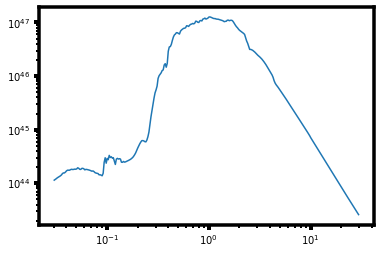

In [12]:
plt.plot(temp_wave,temp_lum)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [13]:
print(iy[ix == 1.0000000000000004][0])


50.0082638140722


In [14]:
print(temp_lum[temp_wave == 1.0050][0])

1.2659749764103498e+47


In [15]:
with fits.open('/Users/connor_auge/Research/Disertation/AGN_SEDs/AHA_SED_paper1/Final_plots/a_six/a_final/SED_paper_tables/Appendix_Table1.fits') as hdul:
    cols = hdul[1].columns
    data = hdul[1].data

print(cols)

with fits.open('/Users/connor_auge/Research/Disertation/AGN_SEDs/AHA_SED_paper1/Final_plots/a_six/a_final/SED_paper_tables/Appendix_Table4.fits') as hdul:
    cols2 = hdul[1].columns
    data2 = hdul[1].data



ColDefs(
    name = 'Field'; format = '32A'
    name = 'x_ID'; format = '32A'
    name = 'phot_id'; format = '32A'
    name = 'RAJ2000'; format = '32A'
    name = 'DEJ2000'; format = '32A'
    name = 'L0510_c'; format = 'D'
    name = 'z_spec'; format = 'D'
    name = 'Nh'; format = 'D'
    name = 'Lbol'; format = 'D'
    name = 'SED_shape'; format = 'D'
)


In [16]:
from astropy.coordinates import SkyCoord
from astropy import units as u

In [17]:
field = data['Field']
ra = data['raJ2000']
dec = data['dej2000']
z = data['z_spec']
id = data['x_ID']
id_phot = data['phot_id']

c = SkyCoord(ra=ra,dec=dec, unit=(u.hourangle, u.deg))
coords = c.to_string('decimal')
RA = []
DEC = []
for i in range(len(coords)):
    C = coords[i].split()
    RA.append(C[0])
    DEC.append(C[1])
RA = np.asarray(RA)
DEC = np.asarray(DEC)

ID_goods = id[np.logical_or(field == 'GOODS-N', field == 'GOODS-S')]
ID_phot_goods = id_phot[np.logical_or(field == 'GOODS-N', field == 'GOODS-S')]
ra_goods = RA[np.logical_or(field == 'GOODS-N', field == 'GOODS-S')]
dec_goods = DEC[np.logical_or(field == 'GOODS-N', field == 'GOODS-S')]
z_goods = z[np.logical_or(field == 'GOODS-N', field == 'GOODS-S')]

ID_s82x = id[field == 'Stripe82X']
ra_s82x = RA[field == 'Stripe82X']
dec_s82x = DEC[field == 'Stripe82X'] 
z_s82x = z[field == 'Stripe82X']


In [18]:
goods_outf = open('/Users/connor_auge/Desktop/Auge_GOODS_targets.csv','w')
goods_outf.writelines('# ID, RA, DEC, z\n')
for i in range(len(ID_goods)):
    goods_outf.writelines('%s, %s, %s, %s\n' % (ID_goods[i], ra_goods[i], dec_goods[i], z_goods[i]))
goods_outf.close()

s82x_outf = open('/Users/connor_auge/Desktop/Auge_S82X_targets.csv', 'w')
s82x_outf.writelines('# ID, RA, DEC, z\n')
for i in range(100):
    s82x_outf.writelines('%s, %s, %s, %s\n' % (ID_s82x[i], ra_s82x[i], dec_s82x[i], z_s82x[i]))
s82x_outf.close()


In [19]:
from astropy.io import fits
import pandas
with fits.open('/Users/connor_auge/Research/Disertation/AGN_SEDs/AHA_SED_paper1/Final_plots/a_six/a_final/SED_paper_tables/Appendix_Table4.fits') as hdul:
    data = hdul[1].data 
    cols = hdul[1].columns

print(cols.names)

['Field', 'phot_id', 'Fxh', 'Fxh_err', 'Fxs', 'Fxs_err', 'FUV', 'FUV_err', 'NUV', 'NUV_err', 'U', 'U_err', 'F435W', 'F435W_err', 'B', 'B_err', 'V', 'V_err', 'F606W', 'F606W_err', 'R', 'R_err', 'I', 'I_err', 'F775W', 'F775W_err', 'F814W', 'F814W_err', 'z', 'z_err', 'F850LP', 'F850LP_err', 'F098M', 'F098M_err', 'F105W', 'F105W_err', 'F125W', 'F125W_err', 'J', 'J_err', 'F140W', 'F140W_err', 'F160W', 'F160W_err', 'H', 'H_err', 'Ks', 'Ks_err', 'IRAC1', 'IRAC1_err', 'IRAC2', 'IRAC2_err', 'IRAC3', 'IRAC3_err', 'IRAC4', 'IRAC4_err', 'F24', 'F24_err', 'F70', 'F70_err', 'F100', 'F100_err', 'F160', 'F160_err', 'F250', 'F250_err', 'F350', 'F350_err', 'F500', 'F500_err']


In [20]:
print(cols.names)
print(data)

['Field', 'phot_id', 'Fxh', 'Fxh_err', 'Fxs', 'Fxs_err', 'FUV', 'FUV_err', 'NUV', 'NUV_err', 'U', 'U_err', 'F435W', 'F435W_err', 'B', 'B_err', 'V', 'V_err', 'F606W', 'F606W_err', 'R', 'R_err', 'I', 'I_err', 'F775W', 'F775W_err', 'F814W', 'F814W_err', 'z', 'z_err', 'F850LP', 'F850LP_err', 'F098M', 'F098M_err', 'F105W', 'F105W_err', 'F125W', 'F125W_err', 'J', 'J_err', 'F140W', 'F140W_err', 'F160W', 'F160W_err', 'H', 'H_err', 'Ks', 'Ks_err', 'IRAC1', 'IRAC1_err', 'IRAC2', 'IRAC2_err', 'IRAC3', 'IRAC3_err', 'IRAC4', 'IRAC4_err', 'F24', 'F24_err', 'F70', 'F70_err', 'F100', 'F100_err', 'F160', 'F160_err', 'F250', 'F250_err', 'F350', 'F350_err', 'F500', 'F500_err']
[('GOODS-N', '-999',  4.4979e-04,  8.99580e-05,  1.07536000e-03,  2.15072000e-04,   0.4725868 ,  7.18640400e-02,   0.4725868 ,  7.18640400e-02, -99.99, -99.99, -9.99900e+01, -9.99900e+01,  1.36981605e+00,  6.08335306e-02,  4.07314855e+00,  9.31121758e-02, -9.99900000e+01, -9.99900000e+01,   9.97824697,  2.58735944e-01,  1.70323373e

In [21]:
peca_stripe = ascii.read('/Users/connor_auge/Downloads/queries/query_results_S82X.csv')
peca_goods = ascii.read('/Users/connor_auge/Downloads/queries/query_results_GOODS.csv')

In [22]:
for i in range(len(ID_goods)):
    print(ID_goods[i],ID_phot_goods[i],z_goods[i])

65 -999 0.436
66 9401 0.959
97 4076 0.937
121 2494 1.14
148 4316 0.846
151 20209 0.679
152 6712 1.02
164 6273 1.014
194 4663 0.761
206 19384 0.85
211 2955 0.954
225 1760 0.934
239 26086 0.871
254 12820 0.959
268 3473 0.943
292 18204 0.858
322 14007 0.961
348 25287 1.012
368 25092 1.024
411 15138 0.677
415 26170 1.146
431 18389 0.512
455 24309 0.904
459 21332 1.019
511 9126 1.021
517 22224 1.146
537 5195 0.979
546 11031 1.143
604 24659 0.837
608 8513 1.168
635 20338 0.306
648 -999 0.443
89 22173 1.037
119 17206 0.574
131 -999 0.72
162 5953 0.034
174 15725 0.31
175 13729 0.543
207 21627 0.998
225 16440 1.034
240 -999 1.185
242 23420 0.605
249 23600 0.735
272 5960 0.675
290 9312 0.664
306 24210 0.569
308 4376 1.097
332 17555 0.735
350 24554 0.761
355 25015 0.229
358 19476 0.481
367 13521 0.604
373 2228 1.044
382 22913 0.736
388 15250 0.668
402 20219 0.738
421 17211 1.033
439 482 1.049
443 8038 1.036
444 24682 0.733
447 7011 1.043
448 1256 1.09
479 24497 1.031
488 25734 0.734
495 24739 0.7

In [29]:
for i in peca_goods:
    print(i)

col1 col2  col3 col4 col5  col6 col7   col8    col9   col10   col11  col12 col13 col14   col15      col16     col17   col18   col19    col20   col21 col22 col23   col24      col25     col26     col27       col28      col29    col30 col31 col32  col33  col34  col35  col36  col37  col38  col39  col40  col41  col42  col43  col44  col45  col46  col47  col48  col49  col50  col51  col52    col53      col54  col55    col56      col57  col58    col59      col60  col61    col62      col63  col64    col65      col66   col67   col68   col69   col70   col71   col72   col73    col74    col75    col76    col77    col78    col79    col80    col81   col82  col83   col84    col85    col86    col87  col88 col89 col90 col91 col92 col93 col94 col95 col96 col97 col98 col99 col100 col101 col102 col103 col104 col105 col106 col107 col108 col109 col110 col111 col112 col113 col114 col115 col116 col117 col118 col119 col120 col121 col122 col123 col124 col125 col126 col127 col128 col129 col130 col131 col132 col133

In [30]:
peca_goods

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59,col60,col61,col62,col63,col64,col65,col66,col67,col68,col69,col70,col71,col72,col73,col74,col75,col76,col77,col78,col79,col80,col81,col82,col83,col84,col85,col86,col87,col88,col89,col90,col91,col92,col93,col94,col95,col96,col97,col98,col99,col100,col101,col102,col103,col104,col105,col106,col107,col108,col109,col110,col111,col112,col113,col114,col115,col116,col117,col118,col119,col120,col121,col122,col123,col124,col125,col126,col127,col128,col129,col130,col131,col132,col133,col134,col135,col136,col137,col138,col139,col140,col141,col142,col143,col144,col145,col146,col147,col148,col149,col150,col151,col152,col153,col154,col155,col156,col157,col158,col159,col160,col161,col162,col163,col164,col165,col166,col167,col168,col169,col170,col171,col172,col173,col174,col175,col176,col177,col178,col179,col180,col181,col182,col183,col184,col185,col186,col187,col188,col189,col190,col191,col192,col193,col194,col195,col196,col197,col198,col199,col200,col201,col202,col203,col204,col205,col206,col207,col208,col209,col210,col211,col212,col213
str3,str7,str8,int64,str18,str19,float64,str8,str18,str8,str6,str3,str5,str8,str10,str10,str8,str18,str8,str8,str18,str19,float64,str11,str11,str9,str13,str11,str13,str18,str19,float64,str7,str5,str7,str5,str7,str5,str7,str5,str7,str5,str8,str9,str8,str9,str18,str9,str8,str18,str8,str9,str12,str8,str9,str12,str8,str9,str12,str8,str9,str12,str8,str9,str12,str8,str6,str8,str6,str8,str6,str8,str6,str9,str7,str9,str7,str9,str7,str9,str7,str7,str5,str9,str7,str9,str7,str5,str3,str11,str11,str5,str3,str11,str12,str11,str12,str11,str11,str22,str22,str5,str3,str22,str12,str6,str4,str22,str22,str6,str4,str6,str4,str11,str21,str11,str22,str11,str11,str11,str11,str11,str11,str6,str4,str22,str22,str22,str22,str6,str4,str6,str4,str6,str4,str6,str4,str10,str10,str9,str10,str9,str10,str6,str4,str9,str7,str9,str7,str9,str8,str9,str9,str9,str7,str9,str8,str10,str8,str9,str10,str9,str10,str9,str9,str9,str10,str18,str18,str18,str18,str18,str18,str5,str3,str5,str3,str6,str6,str5,str3,str5,str3,str5,str3,str5,str3,str5,str18,str5,str3,str5,str3,str5,str3,str18,str18,str6,str4,str18,str18,str6,str4,str6,str4,str6,str4,str6,str4,str6,str4,str6,str4
ID,RA_x,DEC_x,0,RA_y,DEC_y,nan,e_spec_Z,spec_Z,e_phot_Z,phot_Z,e_Z,Z,q_Z,min_phot_Z,max_phot_Z,p_phot_Z,best_Z,e_best_Z,f_best_Z,RA.1,DEC.1,nan,spec_class,gen_class,SED_class,xray_class,image_class,best_class,RA.2,DEC.2,nan,e_U_mag,U_mag,e_B_mag,B_mag,e_V_mag,V_mag,e_R_mag,R_mag,e_I_mag,I_mag,e_Y_mag,Y_mag,e_J_mag,J_mag,e_H_mag,H_mag,e_K_mag,K_mag,e_u_mag,u_mag,u_extinction,e_g_mag,g_mag,g_extinction,e_r_mag,r_mag,r_extinction,e_i_mag,i_mag,i_extinction,e_z_mag,z_mag,z_extinction,e_W1_mag,W1_mag,e_W2_mag,W2_mag,e_W3_mag,W3_mag,e_W4_mag,W4_mag,e_1450Mag,1450Mag,e_1450mag,1450mag,e_FUV_mag,FUV_mag,e_NUV_mag,NUV_mag,e_G_mag,G_mag,e_GBP_mag,GBP_mag,e_GRP_mag,GRP_mag,e_xf1,xf1,e_xf2,xf2,e_xf3,xf3,e_xf4,xf4,e_xf5,xf5,e_xf6,xf6,e_xf7,xf7,e_xf8,xf8,e_xf9,xf9,e_xf10,xf10,e_xf11,xf11,e_xf12,xf12,e_xf13,xf13,e_xf14,xf14,e_xf15,xf15,e_xf16,xf16,e_xf17,xf17,e_xf18,xf18,e_xf19,xf19,e_xf20,xf20,e_xf21,xf21,e_xf22,xf22,e_xf23,xf23,e_xf24,xf24,e_xcr1,xcr1,e_xcr4,xcr4,e_xcr5,xcr5,e_xcr9,xcr9,e_xfd1,xfd1,e_counts1,counts1,e_counts2,counts2,e_counts4,counts4,e_counts5,counts5,e_counts7,counts7,e_counts9,counts9,e_counts11,counts11,e_HR1,HR1,e_HR2,HR2,e_HR3,HR3,e_HR4,HR4,e_HR5,HR5,e_HR6,HR6,e_HR7,HR7,e_HR8,HR8,e_HR9,HR9,e_HR10,HR10,e_rf2,rf2,e_rf3,rf3,e_rf4,rf4,e_rf5,rf5,e_rf6,rf6,e_rf7,rf7,e_rf8,rf8,e_rf9,rf9,e_rf10,rf10,e_rf11,rf11,e_rf12,rf12,e_rf13,rf13,e_rf14,rf14,e_rf15,rf15,e_rf16,rf16,e_rf17,rf17,e_rf20,rf20
65,188.983,62.2655,--,--,--,--,--,--,--,--,--,--,--,--

In [24]:
mag_to_flux(22.36,'R')

4.130724674824886e-06

In [27]:
peca_id = np.array(peca_goods['col1'])

In [64]:
ID_make = '856'
ID_make = '507'
ID_make = '495'

peca_flux = np.array([
    mag_to_flux(np.array(peca_goods['col52'])[peca_id == ID_make], 'sloan_u')[0]*1E6,
    mag_to_flux(np.array(peca_goods['col55'])[peca_id == ID_make],'sloan_g')[0]*1E6,
    mag_to_flux(np.array(peca_goods['col58'])[peca_id == ID_make],'sloan_r')[0]*1E6,
    mag_to_flux(np.array(peca_goods['col61'])[peca_id == ID_make],'sloan_i')[0]*1E6,
    mag_to_flux(np.array(peca_goods['col64'])[peca_id == ID_make],'sloan_z')[0]*1E6,
    mag_to_flux(np.array(peca_goods['col46'])[peca_id == ID_make],'JVHS')[0]*1E6,
    mag_to_flux(np.array(peca_goods['col48'])[peca_id == ID_make],'HVHS')[0]*1E6,
    mag_to_flux(np.array(peca_goods['col50'])[peca_id == ID_make], 'KVHS')[0]*1E6,
    mag_to_flux(np.array(peca_goods['col67'])[peca_id == ID_make],'AB')[0]*1E6,
    mag_to_flux(np.array(peca_goods['col69'])[peca_id == ID_make], 'AB')[0]*1E6,
])
peca_flux

array([         nan,  73.86288198,  72.18155751,  77.98772452,
        81.96458587,  97.10156933, 121.01138984, 156.32421227,
       297.32145464, 391.58518167])

In [62]:
filters = np.array(['U','G','R','I','Z','JVHS', 'HVHS', 'KVHS','W1','W2'])
print(np.shape(peca_flux))
print(len(filters))

(10,)
10


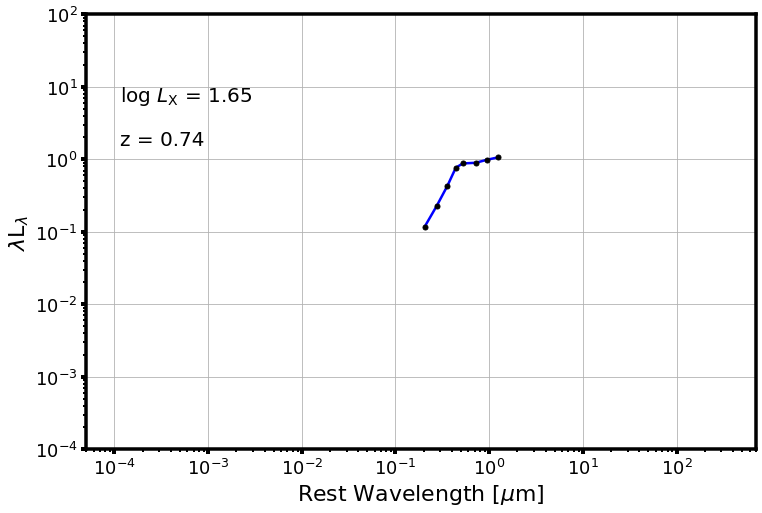

In [63]:
source = AGN('856',0.74,filters,peca_flux,peca_flux*0.2)
source.MakeSED()
f1 = source.Find_value(1.0)
up_check = 0
Id, redshift, w, f, frac_err = source.pull_plot_info(norm_w=1)
plot = Plotter(Id, redshift, w, f, 44.5,f1,up_check)
plot.PlotSED()



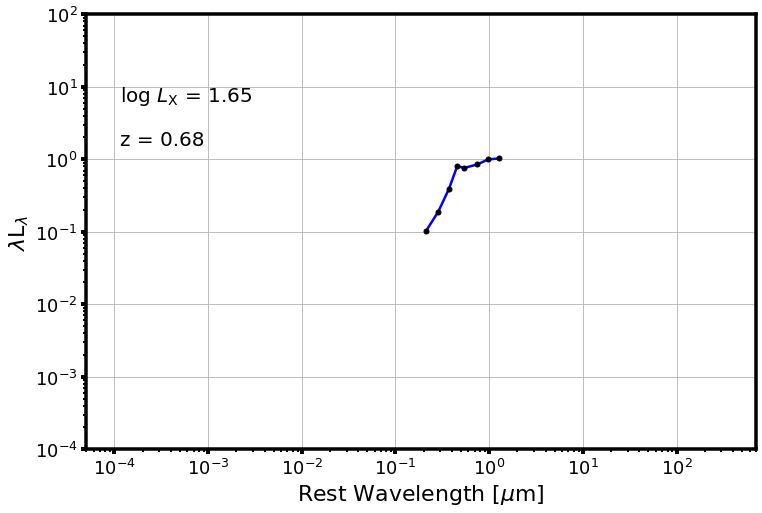

In [57]:
source = AGN('507', 0.68, filters, peca_flux, peca_flux*0.2)
source.MakeSED()
f1 = source.Find_value(1.0)
up_check = 0
Id, redshift, w, f, frac_err = source.pull_plot_info(norm_w=1)
plot = Plotter(Id, redshift, w, f, 44.5, f1, up_check)
plot.PlotSED()


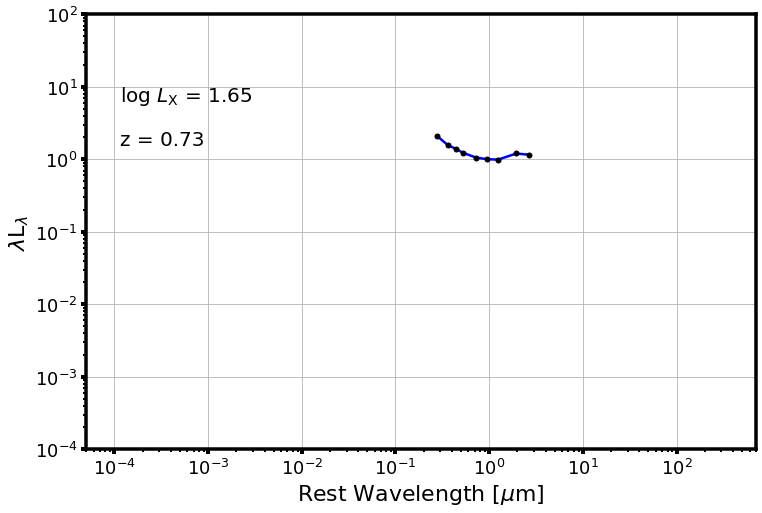

In [65]:
source = AGN('495', 0.73, filters, peca_flux, peca_flux*0.2)
source.MakeSED()
f1 = source.Find_value(1.0)
up_check = 0
Id, redshift, w, f, frac_err = source.pull_plot_info(norm_w=1)
plot = Plotter(Id, redshift, w, f, 44.5, f1, up_check)
plot.PlotSED()
